<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import backend as K
from keras.layers.core import Dense, Activation
import tensorflow as tf
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras.callbacks import Callback
%matplotlib inline

In [2]:
import pandas as pd
datos= pd.read_csv("EnergyMolecule/roboBohr.csv")
datos.shape
datos.info()
datos.describe()
print(datos)
...
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total=len(datos)
df_train=datos[:int(0.6*total)]                       #60% de los datos
df_val=datos[int(0.6*total):int(0.85*total)]          #25% de los datos
df_test=datos[int(0.85*total)::]                      #15% restante

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB
       Unnamed: 0           0          1          2          3          4  \
0               0   73.516695  17.817765  12.469551  12.458130  12.454607   
1               1   73.516695  20.649126  18.527789  17.891535  17.887995   
2               2   73.516695  17.830377  12.512263  12.404775  12.394493   
3               3   73.516695  17.875810  17.871259  17.862402  17.850920   
4               4   73.516695  17.883818  17.868256  17.864221  17.818540   
5               5   53.358707  17.038820  16.981436  16.167446  16.137631   
6               6   53.358707  17.040919  16.975955  16.168874  16.131888   
7               7   53.358707  15.190748  15.134397  15.078282  13.721467   
8               8   73.516695  20.648642  18.559611  17.674347  16.152675   
9               9   73.516695  17.563342  17.562598  12.65

<a id="segundo"></a>
## 2. Deep Networks
Las *deep network*, o lo que hoy en día se conoce como *deep learning*, hace referencia a modelos de redes neuronales estructurados con muchas capas, es decir, el cómputo de la función final es la composición una gran cantidad de funciones ( $f^{(n)} = f^{(n-1)} \circ f^{(n-2)} \circ \cdots \circ f^{(2)} \circ f^{(1)} $ con $n \gg 0$ ).  
Este tipo de redes neuronales tienen una gran cantidad de parámetros, creciendo exponencialmente por capa con las redes *feed forward*, siendo bastante dificiles de entrenar comparadas con una red poco profunda, esto es debido a que requieren una gran cantidad de datos para ajustar correctamente todos esos parámetros. Pero entonces ¿Cuál es el beneficio que tienen este tipo de redes? ¿Qué ganancias trae el añadir capas a una arquitectura de una red neuronal?  

<img src="http://neuralnetworksanddeeplearning.com/images/tikz36.png" title="Title text" width="80%" height="20%" />



En esta sección se estudiará la complejidad de entrenar redes neuronales profundas, mediante la visualización de los gradientes de los pesos en cada capa, el cómo varía mientras se hace el *backpropagation* hacia las primeras capas de la red. 

> a) Se trabajará con las etiquetas escaladas uniformemente, es decir, $\mu=0$ y $\sigma=1$, ajuste sobre el conjunto de entrenamiento y transforme éstas además de las de validación y pruebas.


In [3]:
scaler = StandardScaler().fit(df_train)
#Transform training
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
#Transform val
X_val_scaled = pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)
#Transform test
X_Test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)
y_Test_scaled = X_Test_scaled.pop('Eat').values.reshape(-1,1)

y_train = df_train.pop('Eat').values.reshape(-1,1)
y_val = df_val.pop('Eat').values.reshape(-1,1)


b) Para el mismo problema definido anteriormente (sección 1) se entrenarán diferentes redes. En esta primera instancia se trabajará con la misma red de la pregunta b), inicializada con pesos uniforme. Visualice el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente de cada dato) respecto a los pesos en las distintas capas, para esto se le pedirá el cálculo del gradiente para una capa mediante la función de gradients (link) en el backend de Keras. Deberá generar un histograma para todos los pesos de cada capa antes y despues del entrenamiento con 250 epochs. Comente

In [4]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
listOfVariableTensors = model.trainable_weights 
gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]

fig = plt.figure()
fig.suptitle("GridSpec w/ different subplotpars")
plt.figure(figsize=(12,8))
plt.title('Capa 1 entrenada')
plt.hist(evaluated_gradients, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

NameError: name 'keras' is not defined

<Figure size 432x288 with 0 Axes>

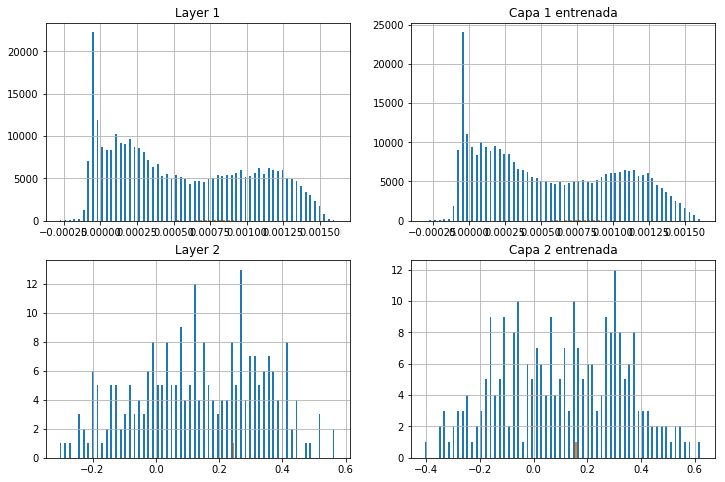

<Figure size 432x288 with 0 Axes>

In [11]:
###calculate gradients
import keras
from keras import backend as K
import tensorflow as tf
#loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
loss = keras.losses.mean_squared_error(model.layers[0].output,y_train_scaled)
loss2 = keras.losses.mean_squared_error(model.layers[1].output,y_train_scaled)
listOfVariableTensors = model.layers[0].trainable_weights 
list1fVariableTensors = model.layers[1].trainable_weights 

gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
gradients2 = K.gradients(loss2, list1fVariableTensors) 
#gradients = tf.keras.backend.gradients(loss,listOfVariableTensors)
#gradients2 = tf.keras.backend.gradients(loss2,list1fVariableTensors)

sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model.input:X_train_scaled.values})
evaluated_gradients2 = sess.run(gradients2,feed_dict={model.input:X_train_scaled.values})

evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
evaluated_gradients2 = [gradient/len(y_train) for gradient in evaluated_gradients2]


Loss = keras.losses.mean_squared_error(model2.layers[0].output,y_train_scaled)
Loss2 = keras.losses.mean_squared_error(model2.layers[1].output,y_train_scaled)
#loss = keras.losses.mean_squared_error(model2.output,y_train_scaled)--original

ListOfVariableTensors = model2.layers[0].trainable_weights 
List1fVariableTensors = model2.layers[1].trainable_weights 

Gradients = K.gradients(Loss, ListOfVariableTensors) #We can now calculate the gradients.
Gradients2 = K.gradients(Loss2,List1fVariableTensors) 
#gradients = tf.keras.backend.gradients(loss,listOfVariableTensors)
#gradients2 = tf.keras.backend.gradients(loss,list1fVariableTensors)

sess = K.get_session()
Evaluated_gradients = sess.run(Gradients,feed_dict={model2.input:X_train_scaled.values})
Evaluated_gradients2 = sess.run(Gradients2,feed_dict={model2.input:X_train_scaled.values})

Evaluated_gradients = [gradient/len(y_train) for gradient in Evaluated_gradients]
Evaluated_gradients2 = [gradient/len(y_train) for gradient in Evaluated_gradients2]

fig = plt.figure()
fig.suptitle("GridSpec w/ different subplotpars")
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.title('Layer 1')
plt.hist(evaluated_gradients, bins = 60)
plt.grid(True)
plt.subplot(223)
plt.title('Layer 2')
plt.hist(evaluated_gradients2, bins = 60)
plt.grid(True)
plt.subplot(222)
plt.title('Capa 1 entrenada')
plt.hist(Evaluated_gradients, bins = 60)
plt.grid(True)
plt.subplot(224)
plt.title('Capa 2 entrenada')
plt.hist(Evaluated_gradients2, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

In [9]:
model2 = Sequential()
model2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model2.compile(optimizer=sgd,loss='mean_squared_error')
#history2 = model2.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
history2=pd.read_csv("history2b.csv")

<Figure size 432x288 with 0 Axes>

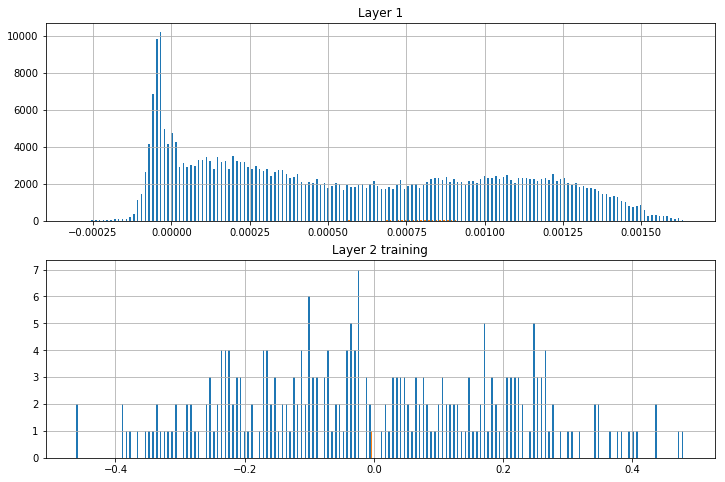

<Figure size 432x288 with 0 Axes>

In [50]:
###calculate gradients
import keras
from keras import backend as K
import tensorflow as tf
loss = keras.losses.mean_squared_error(model2.layers[0].output,y_train_scaled)
loss2 = keras.losses.mean_squared_error(model2.layers[1].output,y_train_scaled)
#loss = keras.losses.mean_squared_error(model2.output,y_train_scaled)--original

listOfVariableTensors = model2.layers[0].trainable_weights 
list1fVariableTensors = model2.layers[1].trainable_weights 

gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
gradients2 = K.gradients(loss2, list1fVariableTensors) 
#gradients = tf.keras.backend.gradients(loss,listOfVariableTensors)
#gradients2 = tf.keras.backend.gradients(loss,list1fVariableTensors)

sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={model2.input:X_train_scaled.values})
evaluated_gradients2 = sess.run(gradients2,feed_dict={model2.input:X_train_scaled.values})

evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
evaluated_gradients2 = [gradient/len(y_train) for gradient in evaluated_gradients2]

fig = plt.figure()
fig.suptitle("GridSpec w/ different subplotpars")
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.title('Layer 1')
plt.hist(evaluated_gradients, bins = 160)
plt.grid(True)
plt.subplot(212)
plt.title('Layer 2 training')
plt.hist(evaluated_gradients2, bins = 160)
plt.grid(True)
plt.show()
plt.clf()

<Figure size 432x288 with 0 Axes>

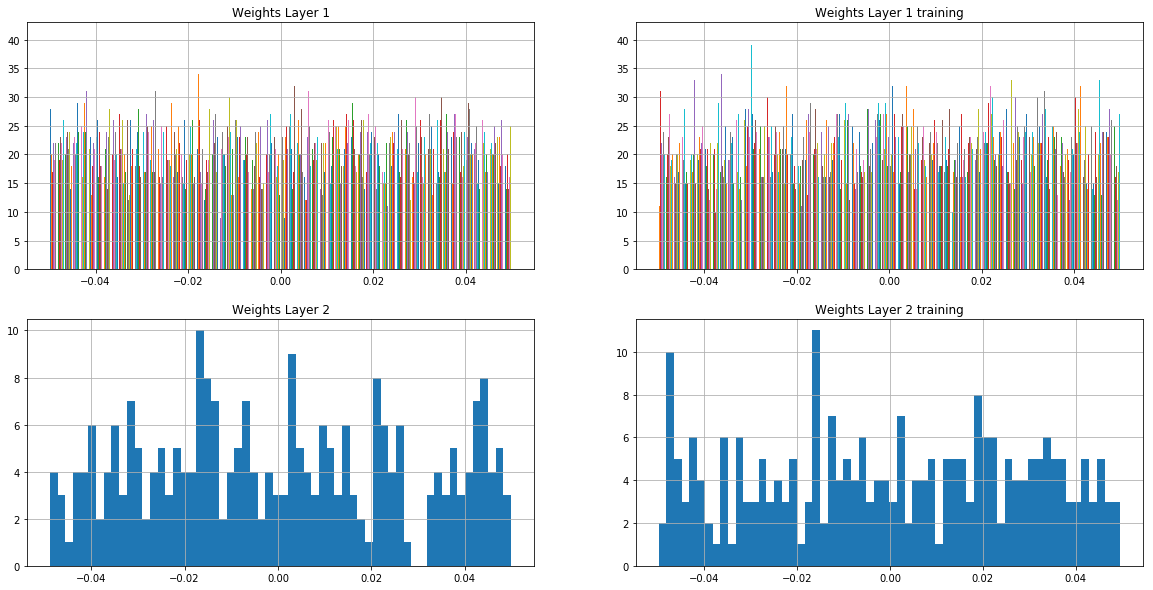

<Figure size 432x288 with 0 Axes>

In [65]:
weightss, biases = model2.layers[0].get_weights()
weightss1, biases1 = model2.layers[1].get_weights()
weightse, biases = model.layers[0].get_weights()
weights1e, biases1 = model.layers[1].get_weights()
fig = plt.figure()
fig.suptitle("GridSpec w/ different subplotpars")
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('Weights Layer 1')
plt.hist(weightss, bins = 60)
plt.grid(True)
plt.subplot(223)
plt.title('Weights Layer 2')
plt.hist(weightss1, bins = 60)
plt.grid(True)
plt.subplot(222)
plt.title('Weights Layer 1 training')
plt.hist(weightse, bins = 60)
plt.grid(True)
plt.subplot(224)
plt.title('Weights Layer 2 training')
plt.hist(weights1e, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

In [16]:
model2.summary()
result= pd.DataFrame(history2.history)
result.to_csv("history2b.csv")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               326656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 326,913
Trainable params: 326,913
Non-trainable params: 0
_________________________________________________________________


> c) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento pero ahora entrenando una red mucho más profunda de 6 capas, 5 capas escondidas y 1 de salida. Utilice el inicializador de pesos *uniform* el cual inicializa mediante una distribución uniforme entre $-1/\sqrt{N}$ y $1/\sqrt{N}$ para cada capa, con $N$ el número de neuronas de la capa anterior. Por simplicidad visualice las 3-4 primeras capas de la red. Comente si observa el efecto del *gradiente desvaneciente* antes y/o después de entrenar.

In [76]:
modelc = Sequential()
modelc.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelc.compile(optimizer=sgd,loss='mean_squared_error')
#historyc = model2.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#result= pd.DataFrame(historyc.history)
#result.to_csv("history2c.csv")

In [77]:
modelc2 = Sequential()
modelc2.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256,  kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(256, kernel_initializer='uniform',activation='sigmoid'))
modelc2.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelc2.compile(optimizer=sgd,loss='mean_squared_error')
historyc=pd.read_csv("history2c.csv")

In [79]:
###calculate gradients
import keras
from keras import backend as K
import tensorflow as tf
#loss = keras.losses.mean_squared_error(model.output,y_train_scaled)
loss = keras.losses.mean_squared_error(modelc.layers[0].output,y_train_scaled)
loss2 = keras.losses.mean_squared_error(modelc.layers[1].output,y_train_scaled)
loss3 = keras.losses.mean_squared_error(modelc.layers[2].output,y_train_scaled)
listOfVariableTensors = modelc.layers[0].trainable_weights 
list1fVariableTensors = modelc.layers[1].trainable_weights 
list2fVariableTensors = modelc.layers[2].trainable_weights 

gradients = K.gradients(loss, listOfVariableTensors) #We can now calculate the gradients.
gradients2 = K.gradients(loss2, list1fVariableTensors) 
gradients3 = K.gradients(loss3, list1fVariableTensors) 
#gradients = tf.keras.backend.gradients(loss,listOfVariableTensors)
#gradients2 = tf.keras.backend.gradients(loss2,list1fVariableTensors)

sess = K.get_session()
evaluated_gradients = sess.run(gradients,feed_dict={modelc.input:X_train_scaled.values})
evaluated_gradients2 = sess.run(gradients2,feed_dict={modelc.input:X_train_scaled.values})
evaluated_gradients3 = sess.run(gradients3,feed_dict={modelc.input:X_train_scaled.values})

evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
evaluated_gradients2 = [gradient/len(y_train) for gradient in evaluated_gradients2]
evaluated_gradients3 = [gradient/len(y_train) for gradient in evaluated_gradients3]

#################################################################
Loss = keras.losses.mean_squared_error(modelc.layers[0].output,y_train_scaled)
Loss2 = keras.losses.mean_squared_error(modelc.layers[1].output,y_train_scaled)
Loss3 = keras.losses.mean_squared_error(modelc.layers[2].output,y_train_scaled)
ListOfVariableTensors = modelc2.layers[0].trainable_weights 
List1fVariableTensors = modelc2.layers[1].trainable_weights 
List2fVariableTensors = modelc2.layers[2].trainable_weights 

Gradients = K.gradients(Loss, ListOfVariableTensors) #We can now calculate the gradients.
Gradients2 = K.gradients(Loss2,List1fVariableTensors) 
Gradients3 = K.gradients(Loss3, List1fVariableTensors) 
#gradients = tf.keras.backend.gradients(loss,listOfVariableTensors)
#gradients2 = tf.keras.backend.gradients(loss2,list1fVariableTensors)

sess = K.get_session()
Evaluated_gradients = sess.run(Gradients,feed_dict={modelc2.input:X_train_scaled.values})
Evaluated_gradients2 = sess.run(Gradients2,feed_dict={modelc2.input:X_train_scaled.values})
Evaluated_gradients3 = sess.run(Gradients3,feed_dict={modelc2.input:X_train_scaled.values})

Evaluated_gradients = [gradient/len(y_train) for gradient in evaluated_gradients]
Evaluated_gradients2 = [gradient/len(y_train) for gradient in evaluated_gradients2]
Evaluated_gradients3 = [gradient/len(y_train) for gradient in evaluated_gradients3]

fig = plt.figure()
fig.suptitle("GridSpec w/ different subplotpars")
plt.figure(figsize=(12,8))

plt.subplot(321)
plt.title('Layer 1')
plt.hist(evaluated_gradients, bins = 60)
plt.grid(True)
plt.subplot(323)
plt.title('Layer 2')
plt.hist(evaluated_gradients2[0][:], bins = 60)
plt.grid(True)
plt.subplot(325)
plt.title('Layer 1')
plt.hist(evaluated_gradients3, bins = 60)
plt.grid(True)
plt.subplot(322)
plt.title('Layer 2')
plt.hist(Evaluated_gradients, bins = 60)
plt.grid(True)
plt.subplot(324)
plt.title('Layer 2')
plt.hist(Evaluated_gradients2, bins = 60)
plt.grid(True)
plt.subplot(326)
plt.title('Layer 2')
plt.hist(Evaluated_gradients3, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

TypeError: Fetch argument None has invalid type <class 'NoneType'>

In [73]:
print(evaluated_gradients3)

[array([[-1.35309107e-04, -1.46957856e-04, -1.72065906e-04, ...,
        -1.40854041e-04, -1.50902808e-04, -1.53867077e-04],
       [-1.33886351e-04, -1.42309145e-04, -1.85017314e-04, ...,
        -1.46147038e-04, -1.47369399e-04, -1.76563160e-04],
       [-3.41052801e-05, -7.56938171e-05, -1.04875340e-04, ...,
        -7.04733029e-05, -6.40679427e-05, -1.51165747e-04],
       ...,
       [-5.20299618e-05, -2.62901776e-05, -5.86863280e-05, ...,
         1.08592874e-04,  1.44283811e-04,  1.61558957e-04],
       [-3.85868407e-05, -2.18436835e-05, -4.34979702e-05, ...,
         1.64642042e-04,  1.65174584e-04,  8.25671159e-05],
       [-3.86196407e-05, -2.18620698e-05, -4.35345246e-05, ...,
         1.64619749e-04,  1.65380392e-04,  8.43845119e-05]], dtype=float32), array([0.00081257, 0.00045968, 0.0009156 , 0.00068322, 0.00078898,
       0.00084695, 0.00089989, 0.00074167, 0.0007683 , 0.00084658,
       0.00054385, 0.00067213, 0.00073001, 0.00086861, 0.00090241,
       0.0008125 , 0.0007

In [ ]:
weightss, biases = modelc.layers[0].get_weights()
weightss1, biases1 = modelc.layers[1].get_weights()
weightse, biases = modelc.layers[2].get_weights()
weights1e, biases1 = modelc.layers[3].get_weights()
fig = plt.figure()
fig.suptitle("GridSpec w/ different subplotpars")
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('Weights Layer 1')
plt.hist(weightss, bins = 60)
plt.grid(True)
plt.subplot(223)
plt.title('Weights Layer 2')
plt.hist(weightss1, bins = 60)
plt.grid(True)
plt.subplot(222)
plt.title('Weights Layer 1 training')
plt.hist(weightse, bins = 60)
plt.grid(True)
plt.subplot(224)
plt.title('Weights Layer 2 training')
plt.hist(weights1e, bins = 60)
plt.grid(True)
plt.show()
plt.clf()

d) Vuelva a generar los histogramas para los gradientes de los pesos de cada capa antes y después del entrenamiento, pero ahora entrenando la red profunda con el inicializador de Glorot [[1]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/(N_{in}+N_{out})}$  y $\sqrt{6/(N_{in}+N_{out})}$ . Por simplicidad visualice las 3-4 primeras capas de la red. Comente si el efecto del *gradiente desvaneciente* se amortigua antes y/o después de entrenar.


In [15]:
modeld = Sequential()
modeld.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modeld.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modeld.compile(optimizer=sgd,loss='mean_squared_error')
historyd = modeld.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resultd= pd.DataFrame(historyd.history)
resultd.to_csv("history2d.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 8s 844us/step - loss: 15.4202 - val_loss: 13.6638
Epoch 2/250
9745/9745 [==============================] - 6s 637us/step - loss: 8.2270 - val_loss: 2.5299
Epoch 3/250
9745/9745 [==============================] - 6s 579us/step - loss: 2.3861 - val_loss: 4.4246
Epoch 4/250
9745/9745 [==============================] - 6s 607us/step - loss: 1.5479 - val_loss: 0.7078
Epoch 5/250
9745/9745 [==============================] - 6s 636us/step - loss: 1.2048 - val_loss: 0.6749
Epoch 6/250
9745/9745 [==============================] - 6s 639us/step - loss: 0.9604 - val_loss: 0.5603
Epoch 7/250
9745/9745 [==============================] - 6s 603us/step - loss: 0.8813 - val_loss: 1.3545
Epoch 8/250
9745/9745 [==============================] - 6s 590us/step - loss: 0.6560 - val_loss: 0.8100
Epoch 9/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.5867 - val_loss: 0.3179
Epoch

Epoch 78/250
9745/9745 [==============================] - 9s 896us/step - loss: 0.0574 - val_loss: 0.0468
Epoch 79/250
9745/9745 [==============================] - 9s 873us/step - loss: 0.0497 - val_loss: 0.0690
Epoch 80/250
9745/9745 [==============================] - 9s 898us/step - loss: 0.0474 - val_loss: 0.0924
Epoch 81/250
9745/9745 [==============================] - 9s 875us/step - loss: 0.0463 - val_loss: 0.0510
Epoch 82/250
9745/9745 [==============================] - 8s 829us/step - loss: 0.0530 - val_loss: 0.0567
Epoch 83/250
9745/9745 [==============================] - 10s 1ms/step - loss: 0.0501 - val_loss: 0.0705
Epoch 84/250
9745/9745 [==============================] - 10s 975us/step - loss: 0.0468 - val_loss: 0.0593
Epoch 85/250
9745/9745 [==============================] - 10s 978us/step - loss: 0.0511 - val_loss: 0.0763
Epoch 86/250
9745/9745 [==============================] - 7s 714us/step - loss: 0.0457 - val_loss: 0.0615
Epoch 87/250
9745/9745 [=====================

9745/9745 [==============================] - 6s 568us/step - loss: 0.0218 - val_loss: 0.0341
Epoch 231/250
9745/9745 [==============================] - 5s 521us/step - loss: 0.0229 - val_loss: 0.0322
Epoch 232/250
9745/9745 [==============================] - 5s 564us/step - loss: 0.0246 - val_loss: 0.0331
Epoch 233/250
9745/9745 [==============================] - 5s 481us/step - loss: 0.0210 - val_loss: 0.0331
Epoch 234/250
9745/9745 [==============================] - 5s 484us/step - loss: 0.0233 - val_loss: 0.0426
Epoch 235/250
9745/9745 [==============================] - 5s 522us/step - loss: 0.0237 - val_loss: 0.0319
Epoch 236/250
9745/9745 [==============================] - 5s 483us/step - loss: 0.0237 - val_loss: 0.0329
Epoch 237/250
9745/9745 [==============================] - 5s 480us/step - loss: 0.0226 - val_loss: 0.0329
Epoch 238/250
9745/9745 [==============================] - 5s 477us/step - loss: 0.0222 - val_loss: 0.0409
Epoch 239/250
9745/9745 [==========================

> e) Vuelva a repetir la experimentación ahora cambiando la función de activación por ReLU, es decir, deberá visualizar los gradientes de los pesos de cada capa antes y después del entrenamiento, con inicialización *uniform* y comparar con la inicialización de He [[2]](#refs), es decir, una distribución uniforme entre -$\sqrt{6/N_{in}}$ y $\sqrt{6/N_{in}} $. Comente si ocurre el mismo fenómeno anterior (para función sigmoidal) sobre el efecto del *gradiente desvaneciente* para la función ReLU. Explique la importancia de la inicialización de los pesos dependiendo de la arquitectura.
```python
...
model.add(Dense(nh, kernel_initializer='uniform',activation='relu')) #uniform
...
or
...
model.add(Dense(nh, kernel_initializer='he_uniform',activation='relu')) #he
...
```

In [18]:
modele = Sequential()
modele.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu')) #uniform
modele.add(Dense(256,  kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modele.add(Dense(256, kernel_initializer='uniform',activation='relu'))
modele.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.001)
modele.compile(optimizer=sgd,loss='mean_squared_error')
historye = modele.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resulte= pd.DataFrame(historyd.history)
resulte.to_csv("history2e(uniform).csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 7s 749us/step - loss: 27.4344 - val_loss: 2.8600
Epoch 2/250
9745/9745 [==============================] - 6s 589us/step - loss: 0.9867 - val_loss: 1.1283
Epoch 3/250
9745/9745 [==============================] - 6s 610us/step - loss: 0.5372 - val_loss: 1.5091
Epoch 4/250
9745/9745 [==============================] - 7s 708us/step - loss: 0.4210 - val_loss: 1.1276
Epoch 5/250
9745/9745 [==============================] - 6s 634us/step - loss: 0.3344 - val_loss: 0.7306
Epoch 6/250
9745/9745 [==============================] - 7s 671us/step - loss: 0.2691 - val_loss: 0.8697
Epoch 7/250
9745/9745 [==============================] - 6s 586us/step - loss: 0.2534 - val_loss: 0.8071
Epoch 8/250
9745/9745 [==============================] - 6s 643us/step - loss: 0.2207 - val_loss: 0.6698
Epoch 9/250
9745/9745 [==============================] - 7s 747us/step - loss: 0.1865 - val_loss: 0.6007
Epoch 

Epoch 78/250
9745/9745 [==============================] - 7s 711us/step - loss: 0.0413 - val_loss: 0.2902
Epoch 79/250
9745/9745 [==============================] - 7s 738us/step - loss: 0.0421 - val_loss: 0.2978
Epoch 80/250
9745/9745 [==============================] - 6s 654us/step - loss: 0.0385 - val_loss: 0.2980
Epoch 81/250
9745/9745 [==============================] - 5s 508us/step - loss: 0.0478 - val_loss: 0.3138
Epoch 82/250
9745/9745 [==============================] - 6s 642us/step - loss: 0.0373 - val_loss: 0.3032
Epoch 83/250
9745/9745 [==============================] - 7s 734us/step - loss: 0.0355 - val_loss: 0.3118
Epoch 84/250
9745/9745 [==============================] - 8s 805us/step - loss: 0.0383 - val_loss: 0.3205
Epoch 85/250
9745/9745 [==============================] - 7s 739us/step - loss: 0.0370 - val_loss: 0.3064
Epoch 86/250
9745/9745 [==============================] - 9s 951us/step - loss: 0.0382 - val_loss: 0.2913
Epoch 87/250
9745/9745 [======================

Epoch 155/250
9745/9745 [==============================] - 8s 805us/step - loss: 0.0241 - val_loss: 0.2928
Epoch 156/250
9745/9745 [==============================] - 9s 890us/step - loss: 0.0217 - val_loss: 0.2834
Epoch 157/250
9745/9745 [==============================] - 9s 926us/step - loss: 0.0248 - val_loss: 0.2714
Epoch 158/250
9745/9745 [==============================] - 9s 918us/step - loss: 0.0246 - val_loss: 0.2818
Epoch 159/250
9745/9745 [==============================] - 9s 971us/step - loss: 0.0245 - val_loss: 0.2760
Epoch 160/250
9745/9745 [==============================] - 9s 971us/step - loss: 0.0236 - val_loss: 0.2881
Epoch 161/250
9745/9745 [==============================] - 7s 706us/step - loss: 0.0238 - val_loss: 0.2845
Epoch 162/250
9745/9745 [==============================] - 6s 645us/step - loss: 0.0237 - val_loss: 0.2957
Epoch 163/250
9745/9745 [==============================] - 6s 637us/step - loss: 0.0267 - val_loss: 0.2867
Epoch 164/250
9745/9745 [============

In [25]:
modelhe = Sequential()
modelhe.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu')) #uniform
modelhe.add(Dense(256,  kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(256, kernel_initializer='he_uniform',activation='relu'))
modelhe.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.00008)
modelhe.compile(optimizer=sgd,loss='mean_squared_error')
historye = modelhe.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resulte= pd.DataFrame(historyd.history)
resulte.to_csv("history2he(he-uniform).csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 18s 2ms/step - loss: 15.9934 - val_loss: 4.1458
Epoch 2/250
9745/9745 [==============================] - 16s 2ms/step - loss: 1.8212 - val_loss: 3.2474
Epoch 3/250
9745/9745 [==============================] - 21s 2ms/step - loss: 1.0384 - val_loss: 2.2443
Epoch 4/250
9745/9745 [==============================] - 22s 2ms/step - loss: 0.6994 - val_loss: 2.0361
Epoch 5/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.5443 - val_loss: 1.9875
Epoch 6/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.4534 - val_loss: 1.7690
Epoch 7/250
9745/9745 [==============================] - 21s 2ms/step - loss: 0.3952 - val_loss: 1.6390
Epoch 8/250
9745/9745 [==============================] - 15s 2ms/step - loss: 0.3391 - val_loss: 1.6707
Epoch 9/250
9745/9745 [==============================] - 19s 2ms/step - loss: 0.3057 - val_loss: 1.5853
Epoch 10/250
97

9745/9745 [==============================] - 5s 509us/step - loss: 0.0326 - val_loss: 0.5384
Epoch 156/250
9745/9745 [==============================] - 5s 530us/step - loss: 0.0330 - val_loss: 0.5520
Epoch 157/250
9745/9745 [==============================] - 6s 584us/step - loss: 0.0336 - val_loss: 0.5173
Epoch 158/250
9745/9745 [==============================] - 5s 523us/step - loss: 0.0334 - val_loss: 0.5173
Epoch 159/250
9745/9745 [==============================] - 5s 527us/step - loss: 0.0322 - val_loss: 0.5260
Epoch 160/250
9745/9745 [==============================] - 5s 529us/step - loss: 0.0320 - val_loss: 0.5238
Epoch 161/250
9745/9745 [==============================] - 5s 498us/step - loss: 0.0321 - val_loss: 0.5078
Epoch 162/250
9745/9745 [==============================] - 5s 491us/step - loss: 0.0321 - val_loss: 0.5589
Epoch 163/250
9745/9745 [==============================] - 6s 573us/step - loss: 0.0319 - val_loss: 0.5220
Epoch 164/250
9745/9745 [==========================

f) ¿Qué es lo que sucede con la red más profunda? ¿El modelo logra convergencia en su entrenamiento? Modifique aspectos estructurales (funciones de activación, inicializadores, regularización, momentum, variación de tasa de aprendizaje, entre otros) de la red profunda de 6 capas definida anteriormente (no modifique la profundidad ni el número de neuronas) para lograr un error cuadrático medio (mse) similar o menor al de una red no profunda, como la definida en b) en esta sección, sobre el conjunto de pruebas.

In [ ]:
modelf = Sequential()
modelf.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modelf.add(Dense(256,  kernel_initializer='glorot_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modelf.add(Dense(256, kernel_initializer='glorot_uniform',activation='sigmoid'))
modelf.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
modelf.compile(optimizer=sgd,loss='mean_squared_error')
historyf = modelf.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
resultf= pd.DataFrame(historyd.history)
resultf.to_csv("history2d.csv")

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 8s 783us/step - loss: 15.6048 - val_loss: 13.4087
Epoch 2/250
9745/9745 [==============================] - 6s 571us/step - loss: 7.3248 - val_loss: 2.0294
Epoch 3/250
1056/9745 [==>...........................] - ETA: 4s - loss: 1.6984